<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/OpenCV_007_HSV_%EB%AA%A8%ED%8F%B4%EB%A1%9C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png">

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[7차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ HSV 색상공간을 이해하고 원하는 색상을 추출하는 방법을 학습한다.<br><br>
○ 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.<br><br>
○ 이미지 필터링 방법에 대해 학습한다.<br><br>
○ 모폴로지 연산 방법에 대해 학습한다.      
        </font></td></tr>   
</table>

# 색상공간 (Color Space) 이해하기

- RGB : Red, Green, Blue로 구성된 색상공간 - PC의 모니터에 주로 사용
  - 가산혼합 : 색을 섞을수록 명도가 높아지는 혼합
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_color_space2.png" width=40%></center>


- CMYK : Cyan, Magenta, Yellow, Black으로 구성된 색상공간 - 인쇄용으로 주로 사용
  - 감산혼합 : 색을 섞을수록 명도가 낮아지는 혼합
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_color_space3.png" width=40%> </center>


- HSV : Hue(색상), Saturation(채도), Value(명도)로 변환한 색상공간
  - 직관적으로 색상 파악이 용이

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_color_space.png" width=50%></center>

- YUV : Y (밝기, 휘도), U, V (색상)을 이용해서 색상을 표현하는 색상공간
  - U축 : 파란색에서 밝기 성분을 뺀 값 (U = B - Y)
  - V축 : 빨간색에서 밝기 성분을 뺀 값 (V = R - Y)
  - 아날로그 컬러신호 변환에 주로 사용
  - TV나 비디오카메라에 주로 사용
  
  
- YCbCr : Y (밝기, 휘도), Cb (청색 크로마 성분), Cr (적색 크로마 성분)을 이용해서 색상을 표현하는 색상공간
   - YUV와 유사한 형태로 RGB 색공간과는 다르게 별도의 명암을 구분하는 U(Cb), V(Cr) 사용
   - 디지털 텔레비전, 비디오, 디지털 사진에서 사용하는 색공간
   
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_color_space4.png" width=20%></center>   


- CIE : 인간의 색채 인지에 대한 연구와 측정을 바탕으로 수학적으로 정의된 색상 공간
  - XYZ : 적색(X), 녹색(Y), 청색(Z) 계열의 반응정도값을 적용
  - Lab : 색오차와 근소한 색차이를 표현하기 위해 변환된 색상 공간
  - Luv : 지각적 분균등성을 해소한 균등 색상 공간 (3차원 직교좌표를 이용하는 색상 공간)
  
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_color_space5.png" width=30%></center>    

- HSV 색상공간의 구성

 <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_hsv.png" width=70%></center>


- 색상 값
  - Hue 값은 0-179 범위로 설정
  - 만약 Hue 값을 -로 설정하면 뒤쪽부터 인덱싱됨

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_hsv2.png" width=50%></center>

<table style="border-collapse: collapse; width: 100%; height: 140px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 20px;">
<td style="width: 13.6047%; text-align: center; height: 20px;"><b>명칭</b></td>
<td style="width: 11.5115%; text-align: center; height: 20px;"><b>값의 범위</b></td>
<td style="width: 49.8837%; text-align: center; height: 20px;"><b>참고</b></td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>색상(H)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 180</td>
<td style="width: 49.8837%; height: 40px;">원래 0~360범위이지만 OpenCV에서는 1/2 범위이다</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>채도(S)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 하얀색, 255에 가까울수록 H의 색상이 된다.</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>명도(V)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 검은색, 255에 가까울수록 &nbsp;H의 색상이 된다.</td>
</tr>
</tbody>

## 색상추적

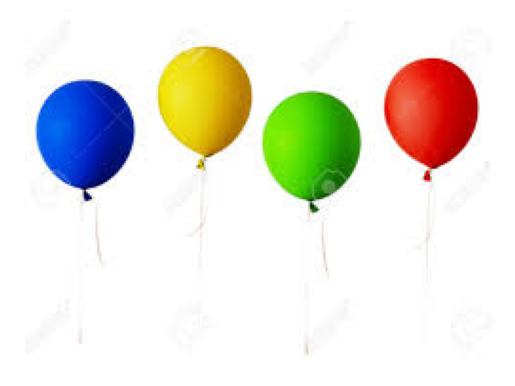

In [39]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/balloon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("./images/balloon.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread("./images/balloon.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img4 = cv2.imread("./images/balloon.jpg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

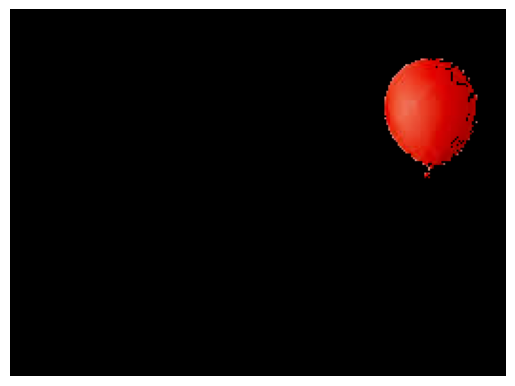

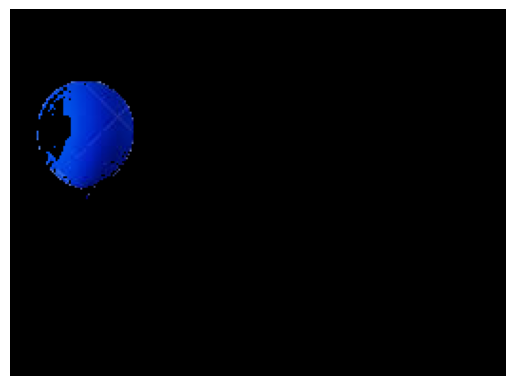

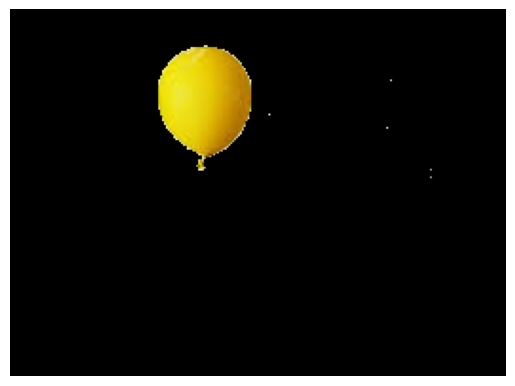

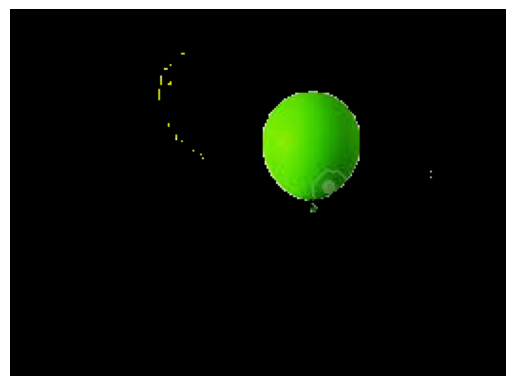

In [44]:
# RGB → HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv2 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
hsv3 = cv2.cvtColor(img3, cv2.COLOR_RGB2HSV)
hsv4 = cv2.cvtColor(img4, cv2.COLOR_RGB2HSV)

# HSV 색상에서 색상, 채도, 명도 범위를 설정
# inRange(hsv, (최소색상, 최소채도, 최소명도), (최대색상, 최대채도, 최대명도))
mask = cv2.inRange(hsv, (0, 100, 100), (15, 255, 255))
mask2 = cv2.inRange(hsv2, (90, 30, 30), (140, 255, 255))
mask3 = cv2.inRange(hsv3, (15, 50, 20), (40, 255, 255))
mask4 = cv2.inRange(hsv4, (30, 50, 50), (70, 255, 255))

img = cv2.bitwise_and(img, img, mask=mask)
img2 = cv2.bitwise_and(img2, img2, mask=mask2)
img3 = cv2.bitwise_and(img3, img3, mask=mask3)
img4 = cv2.bitwise_and(img4, img4, mask=mask4)

plt.imshow(img)
plt.axis("off")
plt.show()

plt.imshow(img2)
plt.axis("off")
plt.show()

plt.imshow(img3)
plt.axis("off")
plt.show()

plt.imshow(img4)
plt.axis("off")
plt.show()

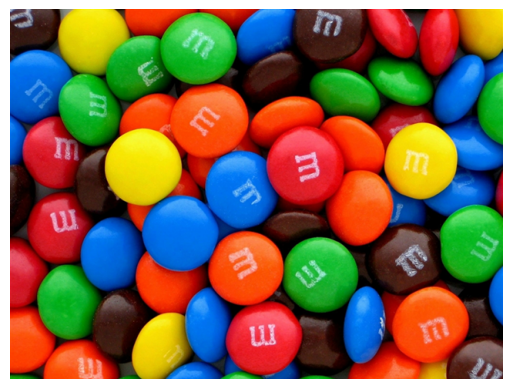

In [65]:
#실습
import cv2
import matplotlib.pyplot as plt

img_cd = cv2.imread("./images/candies.png")
img_cd = cv2.cvtColor(img_cd, cv2.COLOR_BGR2RGB)

plt.imshow(img_cd)
plt.axis("off")
plt.show()

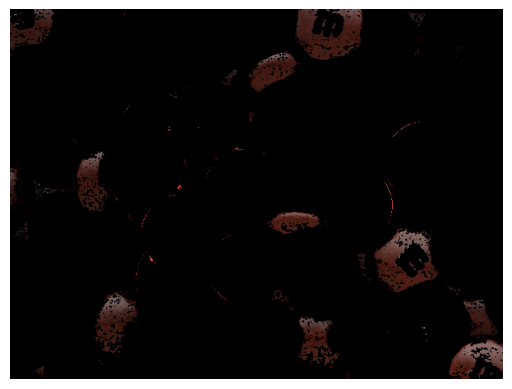

In [87]:
import cv2
import matplotlib.pyplot as plt

img_cd = cv2.imread("./images/candies.png")
img_cd = cv2.cvtColor(img_cd, cv2.COLOR_BGR2RGB)

# RGB → HSV
hsv_cd = cv2.cvtColor(img_cd, cv2.COLOR_RGB2HSV)

# HSV 색상에서 색상, 채도, 명도 범위를 설정
# inRange(hsv, (최소색상, 최소채도, 최소명도), (최대색상, 최대채도, 최대명도))
mask_brown = cv2.inRange(hsv_cd, (0, 10, 5), (7, 210, 230))

img_cd = cv2.bitwise_and(img_cd, img_cd, mask=mask_brown)

plt.imshow(img_cd)
plt.axis("off")
plt.show()


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에서 원하는 색상을 추출해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_extract_color.png" width=60%></center></td></tr>   
</table>

## 크로마 키(Chroma key) 합성

- 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술

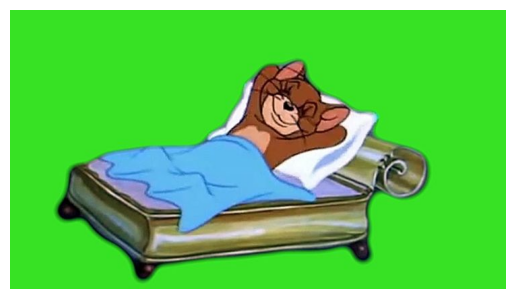

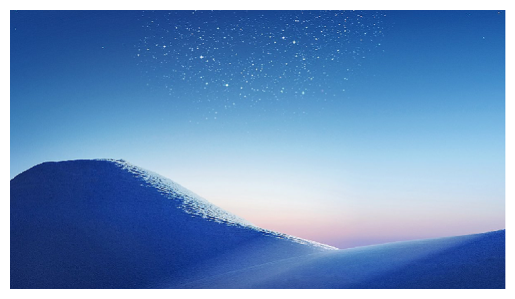

In [98]:
#실습
import cv2
import matplotlib.pyplot as plt

img_cm = cv2.imread("./images/chromakey2.jpg")
img_cm = cv2.cvtColor(img_cm, cv2.COLOR_BGR2RGB)

plt.imshow(img_cm)
plt.axis("off")
plt.show()

back = cv2.imread("./images/back2.png")
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)

plt.imshow(back)
plt.axis("off")
plt.show()

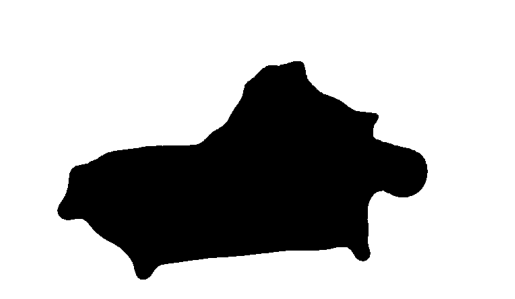

In [99]:
#실습

# 녹색 부분만 필터링
hsv_cm = cv2.cvtColor(img_cm, cv2.COLOR_RGB2HSV)
mask_green = cv2.inRange(hsv_cm, (50, 100, 100), (70, 255, 255))

#img_cm = cv2.bitwise_and(img_cm, img_cm, mask=mask_green)

plt.imshow(mask_green, cmap='gray')
plt.axis("off")
plt.show()

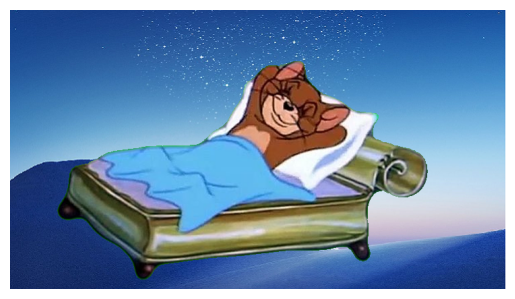

In [100]:
# 합성
# back에, img_cm에 mask 씌어서 붙인 다음 img_cm에 저장한다.
cv2.copyTo(back, mask_green, img_cm)

plt.imshow(img_cm)
plt.axis("off")
plt.show()

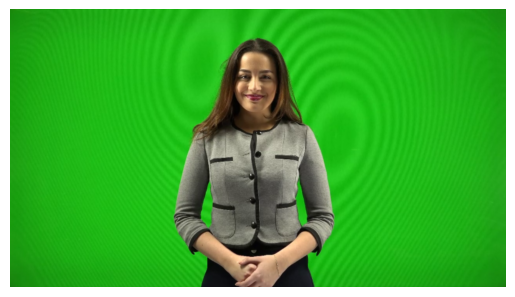

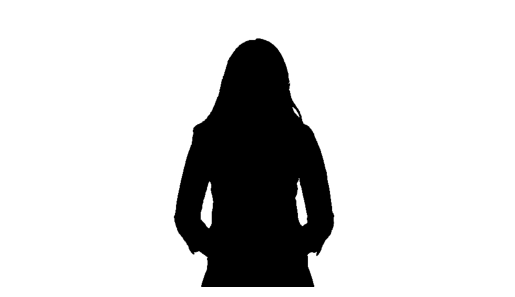

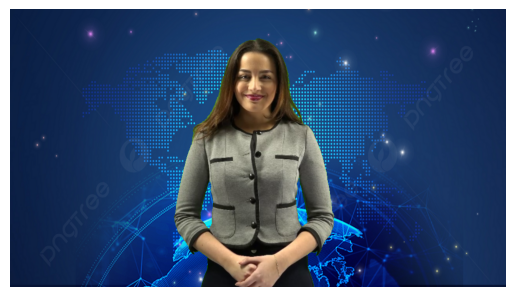

In [107]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread("./images/chromakey1.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
bg = cv2.imread("./images/bg.jpg")
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.axis("off")
plt.show()

# 녹색 부분만 필터링
hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
mask_g = cv2.inRange(hsv_im, (50, 100, 100), (70, 255, 255))

#img_cm = cv2.bitwise_and(img_cm, img_cm, mask=mask_green)

plt.imshow(mask_g, cmap='gray')
plt.axis("off")
plt.show()

cv2.copyTo(bg, mask_g, im)

plt.imshow(im)
plt.axis("off")
plt.show()

# 이미지 연산


## 이미지 필터링 - blur

- <font color=red>cv2.filter2D(img, -1, kernel)</font>
  - 이미지와 필터를 컨볼루션 연산 수행
  - 2번째 파라미터는 색의 깊이 (몇 비트)로 -1이면 원본 이미지와 동일
  - kernel : 적용할 2차원 필터
  
 <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_filter2d.png" width=60%></center>   

In [ ]:
#실습

## 모폴로지 - 침식과 팽창

- Morphology : 영상의 형태학적 측면을 다루는 기법으로 전처리 등에 사용


- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)
- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)
  - iterations = 1 : 반복 적용 회수 (회수가 많아지면 침식과 팽창의 효과가 커짐)
  
 <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_mophology.png" width=60%></center>    

In [ ]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 열림과 팽창 연산을 수행해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_mophology1.png" width=60%></center></td></tr>   
</table>

## Opening과 Closing

- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_mophology3.png" width=40%></center>


- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_mophology4.png" width=40%>  </center>

In [ ]:
#실습

In [ ]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 모폴로지 연산을 이용하여 이미지를 필터링 해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/07_mophology5.png" width=80%></center></td></tr>   
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[7차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>

○ 색상공간의 종류 : RGB, CYMK, HSV, YUV, YCbCr, CIE 등
        
○ HSV 색공간  : H(색상), S(채도), V(명도)
        
        
○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기   
        

○ <font color=red>cv2.filter2D(img, -1, kernel)</font> : 이미지와 필터를 컨볼루션 연산 수행

○ 모폴로지 연산 : 영상의 형태학적 측면을 다루는 기법으로 전처리 등에 사용
        
- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)        

- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)    

- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것       

- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것          
       
</font></td></tr>   
</table>
